In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from skimage.color import rgba2rgb, gray2rgb,rgb2hsv, rgb2gray
from skimage.feature import hog
from skimage import color
from skimage.feature import graycomatrix, graycoprops
import cv2
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


# PREPROCESADO DE IMÁGENES:

In [2]:
def aplanar_imagen(imagen):

    # Convertir la imagen a un array de NumPy
    array_imagen = np.array(imagen)
    
    # Asegurarse de que la imagen esté en escala de grises o RGB
    if len(array_imagen.shape) == 3:  # Imagen RGB
        # Aplana la imagen manteniendo todos los canales
        vector_aplanado = array_imagen.flatten()
    else:  # Imagen en escala de grises
        vector_aplanado = array_imagen.flatten()
    
    return vector_aplanado

def dimension_imagenes(carpeta_imgs,carpeta_masks,target_size=(256,256)):

# Tamaño deseado
  # Reemplaza con el tamaño deseado, por ejemplo, (256, 256)

# Lista de imágenes (rutas o imágenes cargadas)

    resized_images = []
    resized_masks = []
    for imagen in carpeta_imgs:
        with Image.open(imagen) as img:
            resized_img = img.resize(target_size)  # Redimensiona la imagen
            resized_img.convert('RGB')
            resized_images.append(resized_img)  # Guarda la imagen redimensionada
    
    for mask in carpeta_masks:
        with Image.open(mask) as msk:
            resized_mask = msk.resize(target_size)  # Redimensiona la imagen
            resized_mask.convert('L')

            resized_masks.append(resized_mask)

    return resized_images, resized_masks

def aplicar_mascara(image,mascara):
    masked_image = Image.composite(image, Image.new("RGBA", image.size, (0, 0, 0, 0)), mascara)
    return masked_image

# IMPORTAMOS LAS IMÁGENES

In [3]:

image_folder = 'objects/images/flamingo'
mask_folder = 'objects/masks/flamingo'

images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg'))]
masks = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg'))]
vectores_aplanados = [aplanar_imagen(imagen) for imagen in images]
vectores_aplanados = [aplanar_imagen(mask) for mask in masks]

resized_images,resized_masks=dimension_imagenes(images,masks)

flamencazos=[]
for i in range(len(resized_images)):
    imagen_mascara=aplicar_mascara(resized_images[i],resized_masks[i])
    imagen_mascara.convert('RGB')
    img_prueba=np.array(imagen_mascara)
    flamencazos.append(img_prueba)
et_flam=[]
for i in range(len(flamencazos)):
    et_flam.append('O')


image_folder = 'objects/images/elephant'
mask_folder = 'objects/masks/elephant'

images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg'))]
masks = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg'))]
vectores_aplanados = [aplanar_imagen(imagen) for imagen in images]
vectores_aplanados = [aplanar_imagen(mask) for mask in masks]

resized_images,resized_masks=dimension_imagenes(images,masks)
elefantonaldos=[]
for i in range(len(resized_images)):
    imagen_mascara=aplicar_mascara(resized_images[i],resized_masks[i])
    imagen_mascara.convert('RGB')
    img_prueba=np.array(imagen_mascara)
    elefantonaldos.append(img_prueba)
# Asumimos que flamencazos contiene objetos de tipo Pillow.Image
et_ele=[]
for i in range(len(elefantonaldos)):
    et_ele.append('E')


image_folder = 'objects/images/rhino'
mask_folder = 'objects/masks/rhino'

images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg'))]
masks = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg'))]
vectores_aplanados = [aplanar_imagen(imagen) for imagen in images]
vectores_aplanados = [aplanar_imagen(mask) for mask in masks]

resized_images,resized_masks=dimension_imagenes(images,masks)
rhinos=[]
for i in range(len(resized_images)):
    imagen_mascara=aplicar_mascara(resized_images[i],resized_masks[i])
    imagen_mascara.convert('RGB')
    img_prueba=np.array(imagen_mascara)
    rhinos.append(img_prueba)
et_rhin=[]
for i in range(len(rhinos)):
    et_rhin.append('R')


image_folder = 'objects/images/emu'
mask_folder = 'objects/masks/emu'

images = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg'))]
masks = [os.path.join(mask_folder, f) for f in os.listdir(mask_folder) if f.endswith(('.png', '.jpg'))]
vectores_aplanados = [aplanar_imagen(imagen) for imagen in images]
vectores_aplanados = [aplanar_imagen(mask) for mask in masks]

resized_images,resized_masks=dimension_imagenes(images,masks)
epamues=[]
for i in range(len(resized_images)):
    imagen_mascara=aplicar_mascara(resized_images[i],resized_masks[i])
    imagen_mascara.convert('RGB')
    img_prueba=np.array(imagen_mascara)
    epamues.append(img_prueba)
et_emu=[]
for i in range(len(epamues)):
    et_emu.append('O')
animales = np.concatenate([np.array(rhinos),np.array(elefantonaldos),np.array(flamencazos), np.array(epamues)])
et_animales= np.concatenate([np.array(et_rhin),np.array(et_ele),np.array(et_flam), np.array(et_emu)])
# Concatenar los datos
animales = np.concatenate([np.array(rhinos), np.array(elefantonaldos), np.array(flamencazos), np.array(epamues)])
et_animales = np.concatenate([np.array(et_rhin), np.array(et_ele), np.array(et_flam), np.array(et_emu)])

# Crear un shuffle usando un índice aleatorio
indices = np.arange(len(animales))
np.random.shuffle(indices)

# Aplicar el shuffle a ambos arreglos
animales = animales[indices]
et_animales = et_animales[indices]

# CARÁCTERÍSTICAS EXTRAÍDAS:

In [49]:

def extraer_caracteristicas_canny(imagen):
    # Convertir la imagen a escala de grises
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    
    # Aplicar el detector de bordes de Canny
    bordes = cv2.Canny(imagen_gray, 100, 200)
    
    # Extraer las características (puedes usar estadísticas como la media o la varianza de los bordes)
    # Aquí utilizamos la media de los valores de los bordes como característica
    return bordes.mean()
def extraer_caracteristicas_rgb(imagen):
    """
    Extrae características de color en el espacio RGB de una imagen.
    
    Parámetros:
    - imagen: La imagen de entrada (debe ser RGB, RGBA, o escala de grises).
    
    Retorna:
    - Un array con las características extraídas (valores de los canales R, G, B).
    """
    # Asegurar que la imagen es al menos 2D
    if len(imagen.shape) == 1:
        raise ValueError("La imagen parece ser 1D. Verifica el conjunto de datos.")
    
    # Convertir la imagen a formato RGB si es necesario
    if imagen.shape[-1] == 4:  # RGBA
        imagen = rgba2rgb(imagen)
    elif len(imagen.shape) == 2 or imagen.shape[-1] == 1:  # Escala de grises
        imagen = gray2rgb(imagen)
    
    # Normalizar la imagen a valores entre 0 y 1
    imagen_rgb = imagen / 255.0 if imagen.max() > 1 else imagen

    # Extraer los valores de los canales RGB
    r_channel = imagen_rgb[:, :, 0]
    g_channel = imagen_rgb[:, :, 1]
    b_channel = imagen_rgb[:, :, 2]
    
    # Calcular estadísticas para cada canal (media, desviación estándar, min, max)
    características_rgb = [
        np.mean(r_channel), np.std(r_channel), np.min(r_channel), np.max(r_channel),
        np.mean(g_channel), np.std(g_channel), np.min(g_channel), np.max(g_channel),
        np.mean(b_channel), np.std(b_channel), np.min(b_channel), np.max(b_channel)
    ]
    
    return características_rgb


def extraer_caracteristicas_hog(imagen):
    """
    Extrae las características HOG de una imagen.
    """
    # Convertir la imagen a RGB si tiene un canal alfa
    if imagen.shape[2] == 4:  # Si la imagen tiene 4 canales (RGBA)
        imagen = imagen[:, :, :3]  # Elimina el canal alfa

    # Convertir la imagen a escala de grises
    img_gray = color.rgb2gray(imagen)
    
    # Extraer las características HOG
    caracteristicas_hog, _ = hog(img_gray, block_norm='L2-Hys', pixels_per_cell=(16, 16
                                                                                ),
                                 cells_per_block=(2, 2), visualize=True)
    
    # Asegurarse de que las características HOG son un vector 1D
    return caracteristicas_hog.flatten()

def extraer_caracteristicas_color(imagen):
    """
    Extrae características de color de una imagen.
    Si la imagen no es RGB, la convierte a RGB.
    Devuelve un vector con estadísticas de color para cada canal (R, G, B).
    """
    # Convertir a RGB si es necesario
    if imagen.shape[-1] == 4:  # RGBA
        imagen = rgba2rgb(imagen)
    elif len(imagen.shape) == 2 or imagen.shape[-1] == 1:  # Escala de grises
        imagen = gray2rgb(imagen)
    
    # Separar los canales de color
    r_channel = imagen[:, :, 0]
    g_channel = imagen[:, :, 1]
    b_channel = imagen[:, :, 2]
    
    # Calcular estadísticas para cada canal
    stats = []
    for channel in [r_channel, g_channel, b_channel]:
        stats.extend([
            np.mean(channel),  # Promedio
            np.std(channel),   # Desviación estándar
            np.min(channel),   # Valor mínimo
            np.max(channel),   # Valor máximo
            np.percentile(channel, 25),  # Percentil 25
            np.percentile(channel, 50),  # Mediana
            np.percentile(channel, 75)   # Percentil 75
        ])
    
    return np.array(stats)


def extraer_caracteristicas_hsv(imagen):
    """
    Extrae características de color en el espacio HSV de una imagen.
    
    Parámetros:
    - imagen: La imagen de entrada (debe ser RGB).
    
    Retorna:
    - Un array con las características extraídas (valores de los canales H, S, V).
    """
    # Asegurarse de que la imagen esté en formato RGB
    if imagen.shape[-1] == 4:  # Si la imagen tiene un canal alfa (RGBA), eliminarlo
        imagen = imagen[:, :, :3]
    elif imagen.shape[-1] != 3:
        raise ValueError("La imagen debe tener 3 canales (RGB).")
    
    # Normalizar la imagen a valores entre 0 y 1 si es necesario
    imagen_rgb = imagen / 255.0
    
    # Convertir la imagen de RGB a HSV
    imagen_hsv = rgb2hsv(imagen_rgb)
    
    # Extraer los valores de los canales HSV
    h_channel = imagen_hsv[:, :, 0]
    s_channel = imagen_hsv[:, :, 1]
    v_channel = imagen_hsv[:, :, 2]
    
    # Calcular estadísticas para cada canal (media, desviación estándar, min, max)
    características_hsv = [
        np.mean(h_channel), np.std(h_channel), np.min(h_channel), np.max(h_channel),
        np.mean(s_channel), np.std(s_channel), np.min(s_channel), np.max(s_channel),
        np.mean(v_channel), np.std(v_channel), np.min(v_channel), np.max(v_channel)
    ]
    
    return características_hsv


def extraer_caracteristicas_textura(imagen):
    """
    Extrae características de textura utilizando la Matriz de Co-ocurrencia de Nivel de Gris (GLCM).
    
    Parámetros:
    - imagen: La imagen de entrada (puede ser RGB o en escala de grises).
    
    Retorna:
    - Un array con las características de textura (contrast, dissimilarity, homogeneity, energy, correlation, ASM).
    """
        # Asegurarse de que la imagen esté en formato RGB
    if imagen.shape[-1] == 4:  # Si la imagen tiene un canal alfa (RGBA), eliminarlo
        imagen = imagen[:, :, :3]
    # Convertir la imagen a escala de grises si es RGB
    if len(imagen.shape) == 3 and imagen.shape[-1] == 3:
        imagen = rgb2gray(imagen)
    
    # Asegurarse de que los valores estén en el rango 0-255
    imagen = (imagen * 255).astype(np.uint8)
    
    # Calcular la matriz de co-ocurrencia (distancia=1, ángulo=0°)
    glcm = graycomatrix(imagen, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    
    # Calcular propiedades de textura
    contraste = graycoprops(glcm, 'contrast').mean()
    disimilitud = graycoprops(glcm, 'dissimilarity').mean()
    homogeneidad = graycoprops(glcm, 'homogeneity').mean()
    energia = graycoprops(glcm, 'energy').mean()
    correlacion = graycoprops(glcm, 'correlation').mean()
    asm = graycoprops(glcm, 'ASM').mean()
    
    # Devolver las características como un array
    return [contraste, disimilitud, homogeneidad, energia, correlacion, asm]




def extraer_caracteristicas_laplacianas(imagen):
    """
    Extrae características basadas en el filtro Laplaciano para detectar regiones de alto cambio en la imagen.

    Parámetros:
    - imagen: La imagen de entrada (RGB o escala de grises).

    Retorna:
    - Un array con las características laplacianas: media, desviación estándar, min, max.
    """
    # Convertir la imagen a escala de grises si es RGB
    if imagen.shape[-1] == 4:  # Si la imagen tiene un canal alfa (RGBA), eliminarlo
        imagen = imagen[:, :, :3]
    if len(imagen.shape) == 3:
        imagen_gris = rgb2gray(imagen)
    else:
        imagen_gris = imagen

    # Normalizar la imagen a valores entre 0 y 255
    imagen_gris = (imagen_gris * 255).astype(np.uint8)

    # Aplicar el filtro Laplaciano
    laplaciana = cv2.Laplacian(imagen_gris, cv2.CV_64F)

    # Calcular estadísticas de la respuesta laplaciana
    media = np.mean(laplaciana)
    desviacion = np.std(laplaciana)
    minimo = np.min(laplaciana)
    maximo = np.max(laplaciana)

    return [media, desviacion, minimo, maximo]


# PRIMER MODELO 
Baseline, caractersiticas RGB.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)

# Aplanar las imágenes
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Extraer características RGB
X_train_rgb = np.array([extraer_caracteristicas_rgb(img) for img in X_train])
X_test_rgb = np.array([extraer_caracteristicas_rgb(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_flat, X_train_rgb))
X_test_combined = np.hstack((X_test_flat, X_test_rgb))

# Crear y entrenar el modelo
modelo_baseline = LogisticRegression(max_iter=1000)
modelo_baseline.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_baseline.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           E       0.64      0.54      0.58        13
           O       0.76      0.57      0.65        23
           R       0.52      0.85      0.65        13

    accuracy                           0.63        49
   macro avg       0.64      0.65      0.63        49
weighted avg       0.67      0.63      0.63        49



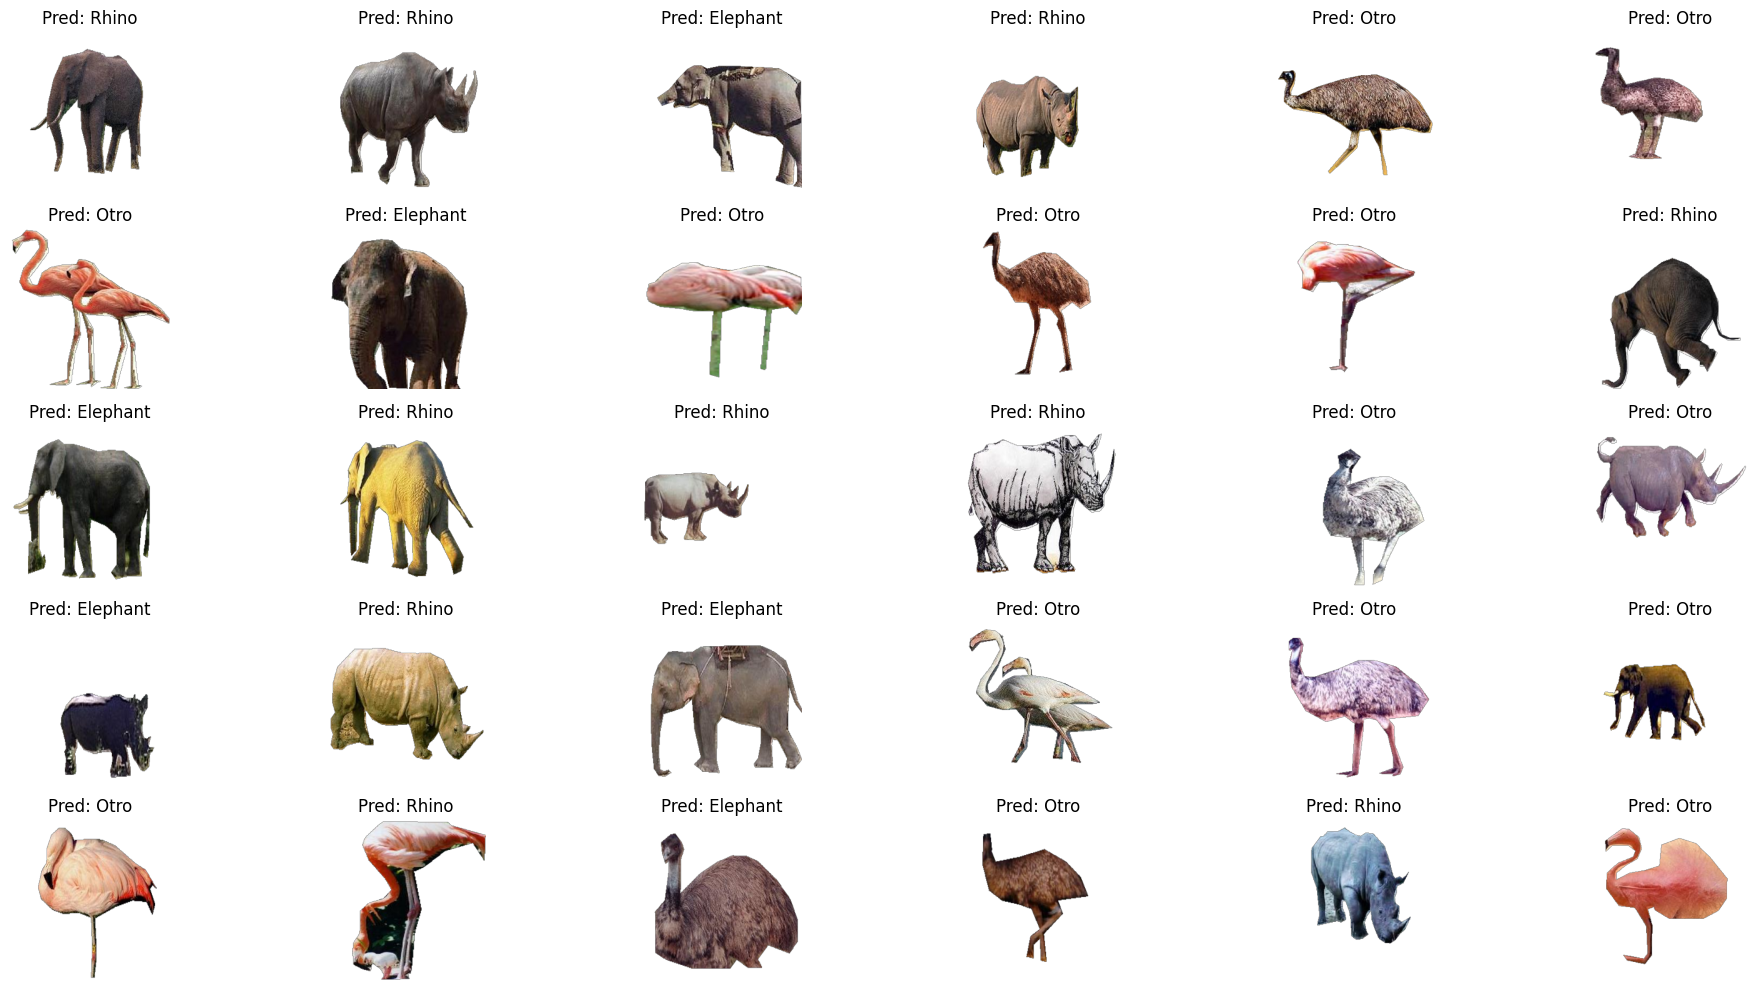

In [6]:

# Diccionario de etiquetas
etiquetas_dict = { 'E': 'Elephant', 'O': 'Otro', 'R': 'Rhino'}

# Número de imágenes que quieres mostrar
n_muestras = 30

# Seleccionar el número de filas y columnas para organizar las imágenes
n_filas = 5  # Definir 3 filas
n_columnas = 6  # Definir 10 columnas

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(20, 10))

# Aplanar los ejes para facilitar la indexación
axes = axes.flatten()

# Mostrar las imágenes
for i in range(n_muestras):
    # Obtener la imagen y la etiqueta real
    img = X_test[i]
    etiqueta_real = y_test[i]
    etiqueta_predicha = y_pred[i]
    
    # Mostrar la imagen
    axes[i].imshow(img)
    
    # Títulos de las imágenes con la etiqueta real y la predicción
    axes[i].set_title(f'Pred: {etiquetas_dict[etiqueta_predicha]}')
    
    # Ocultar los ejes
    axes[i].axis('off')

# Ajustar el espaciado y mostrar todas las imágenes
plt.tight_layout()
plt.show()


In [7]:


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)

# Aplanar las imágenes
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Extraer características RGB
X_train_rgb = np.array([extraer_caracteristicas_rgb(img) for img in X_train])
X_test_rgb = np.array([extraer_caracteristicas_rgb(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_flat, X_train_rgb))
X_test_combined = np.hstack((X_test_flat, X_test_rgb))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.60      0.46      0.52        13
           O       0.83      0.65      0.73        23
           R       0.48      0.77      0.59        13

    accuracy                           0.63        49
   macro avg       0.64      0.63      0.61        49
weighted avg       0.68      0.63      0.64        49



# MODELO BASELINE CON HSV 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)

# Aplanar las imágenes
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Extraer características RGB
X_train_hsv = np.array([extraer_caracteristicas_hsv(img) for img in X_train])
X_test_hsv = np.array([extraer_caracteristicas_hsv(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_flat, X_train_hsv))
X_test_combined = np.hstack((X_test_flat, X_test_hsv))

# Crear y entrenar el modelo
modelo_baseline = LogisticRegression(max_iter=1000)
modelo_baseline.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_baseline.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           E       0.64      0.54      0.58        13
           O       0.76      0.57      0.65        23
           R       0.52      0.85      0.65        13

    accuracy                           0.63        49
   macro avg       0.64      0.65      0.63        49
weighted avg       0.67      0.63      0.63        49



# BASELINE + HOG

In [9]:


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)

# Aplanar las imágenes
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Extraer características RGB
X_train_hog = np.array([extraer_caracteristicas_hog(img) for img in X_train])
X_test_hog = np.array([extraer_caracteristicas_hog(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_flat, X_train_hog))
X_test_combined = np.hstack((X_test_flat, X_test_hog))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.60      0.46      0.52        13
           O       0.83      0.65      0.73        23
           R       0.48      0.77      0.59        13

    accuracy                           0.63        49
   macro avg       0.64      0.63      0.61        49
weighted avg       0.68      0.63      0.64        49



# HOG 

In [10]:
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_hog, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_hog)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.73      0.62      0.67        13
           O       0.95      0.78      0.86        23
           R       0.63      0.92      0.75        13

    accuracy                           0.78        49
   macro avg       0.77      0.77      0.76        49
weighted avg       0.81      0.78      0.78        49



# HOG + HSV 

In [19]:

# Combinar características
X_train_combined = np.hstack((X_train_hsv, X_train_hog))
X_test_combined = np.hstack((X_test_hsv, X_test_hog))
scaler = StandardScaler()
# Combinar características
X_train_combined = np.hstack((X_train_hsv, X_train_hog))
X_test_combined = np.hstack((X_test_hsv, X_test_hog))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           E       0.73      0.62      0.67        13
           O       0.94      0.74      0.83        23
           R       0.60      0.92      0.73        13

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.74        49
weighted avg       0.80      0.76      0.76        49



# HOG + RGB

In [16]:


# Combinar características
X_train_combined = np.hstack((X_train_rgb, X_train_hog))
X_test_combined = np.hstack((X_test_rgb, X_test_hog))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       0.95      0.87      0.91        23
           R       0.71      0.92      0.80        13

    accuracy                           0.84        49
   macro avg       0.83      0.83      0.82        49
weighted avg       0.85      0.84      0.84        49



# HOG + TEXTURA 

In [30]:


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)


# Extraer características RGB
X_train_textura = np.array([extraer_caracteristicas_textura(img) for img in X_train])
X_test_textura = np.array([extraer_caracteristicas_textura(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_textura, X_train_hog))
X_test_combined = np.hstack((X_test_textura, X_test_hog))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       1.00      0.91      0.95        23
           R       0.71      0.92      0.80        13

    accuracy                           0.86        49
   macro avg       0.84      0.84      0.83        49
weighted avg       0.87      0.86      0.86        49



In [33]:


X_train_combined = np.hstack((X_train_textura, X_train_hog, X_train_hsv))
X_test_combined = np.hstack((X_test_textura, X_test_hog, X_test_hsv))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       0.95      0.91      0.93        23
           R       0.69      0.85      0.76        13

    accuracy                           0.84        49
   macro avg       0.82      0.82      0.81        49
weighted avg       0.85      0.84      0.84        49



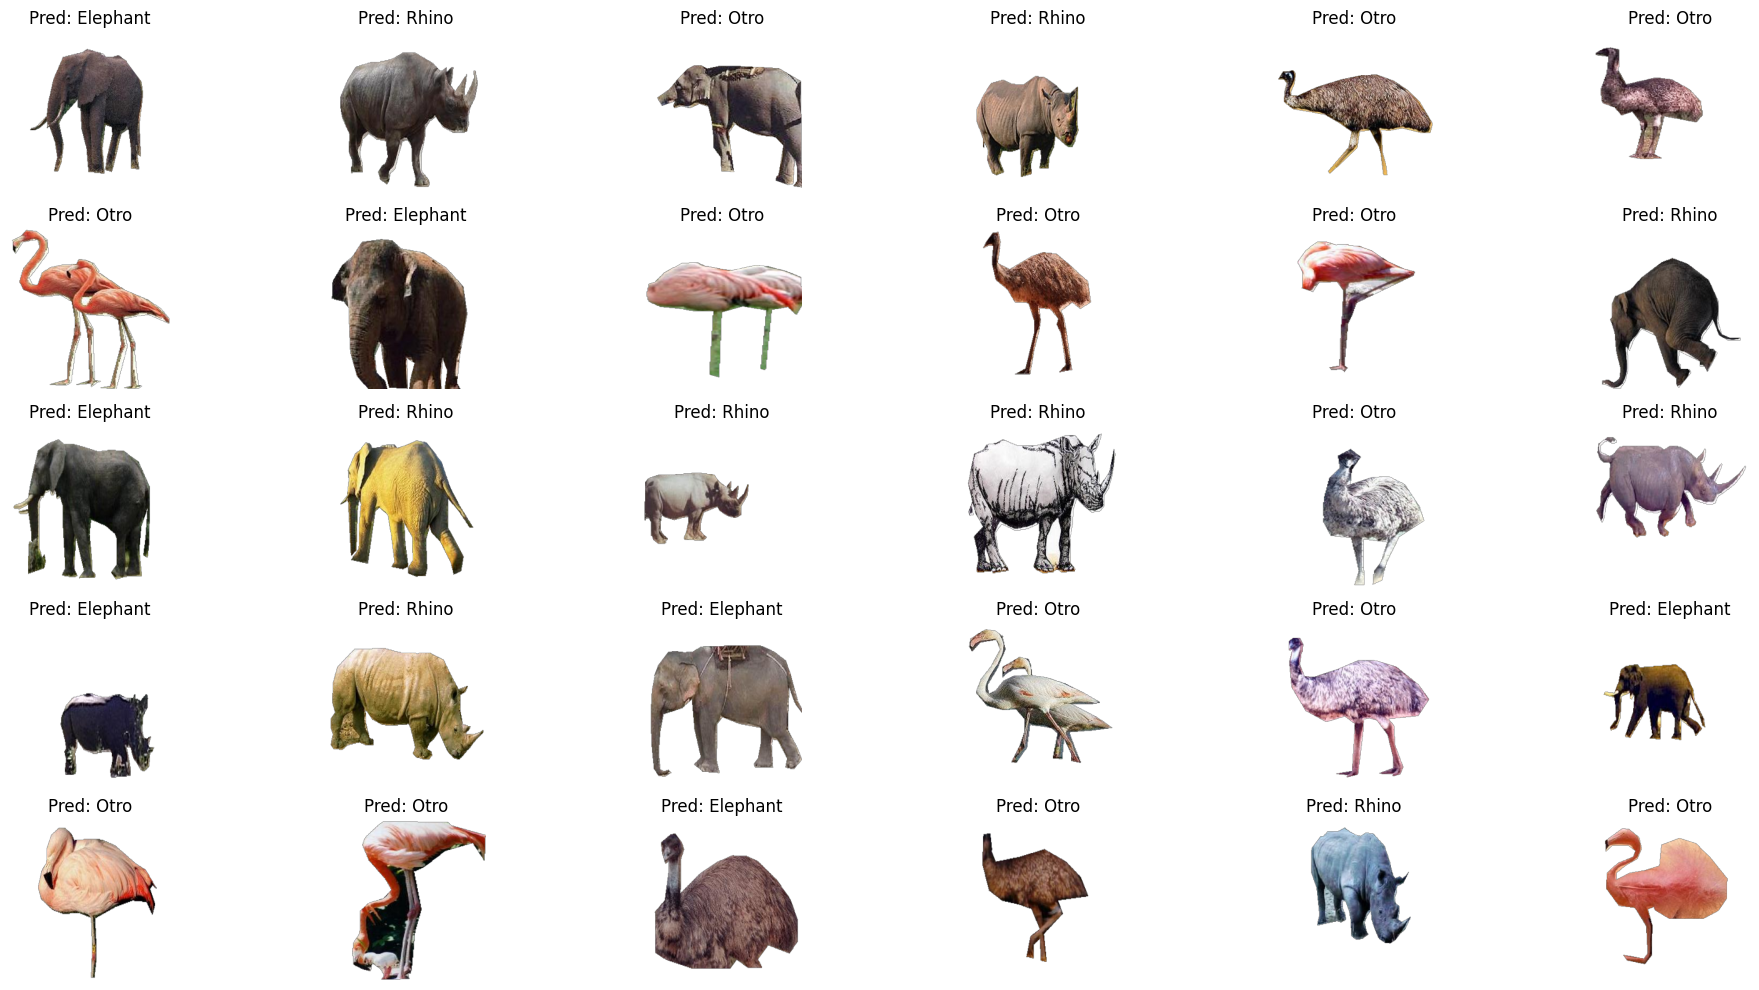

In [58]:

# Diccionario de etiquetas
etiquetas_dict = { 'E': 'Elephant', 'O': 'Otro', 'R': 'Rhino'}

# Número de imágenes que quieres mostrar
n_muestras = 30

# Seleccionar el número de filas y columnas para organizar las imágenes
n_filas = 5  # Definir 3 filas
n_columnas = 6  # Definir 10 columnas

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(20, 10))

# Aplanar los ejes para facilitar la indexación
axes = axes.flatten()

# Mostrar las imágenes
for i in range(n_muestras):
    # Obtener la imagen y la etiqueta real
    img = X_test[i]
    etiqueta_real = y_test[i]
    etiqueta_predicha = y_pred[i]
    
    # Mostrar la imagen
    axes[i].imshow(img)
    
    # Títulos de las imágenes con la etiqueta real y la predicción
    axes[i].set_title(f'Pred: {etiquetas_dict[etiqueta_predicha]}')
    
    # Ocultar los ejes
    axes[i].axis('off')

# Ajustar el espaciado y mostrar todas las imágenes
plt.tight_layout()
plt.show()


In [37]:


X_train_combined = np.hstack((X_train_textura, X_train_hog, X_train_rgb))
X_test_combined = np.hstack((X_test_textura, X_test_hog, X_test_rgb))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       0.95      0.87      0.91        23
           R       0.71      0.92      0.80        13

    accuracy                           0.84        49
   macro avg       0.83      0.83      0.82        49
weighted avg       0.85      0.84      0.84        49



    CARACTERÍSTICAS LAPLACIANAS + BASELINE 

In [38]:


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)


# Extraer características RGB
X_train_lp7 = np.array([extraer_caracteristicas_laplacianas(img) for img in X_train])
X_test_lp7 = np.array([extraer_caracteristicas_laplacianas(img) for img in X_test])

# Combinar características
X_train_combined = np.hstack((X_train_lp7, X_train_hog))
X_test_combined = np.hstack((X_test_lp7, X_test_hog))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.83      0.77      0.80        13
           O       1.00      0.74      0.85        23
           R       0.60      0.92      0.73        13

    accuracy                           0.80        49
   macro avg       0.81      0.81      0.79        49
weighted avg       0.85      0.80      0.80        49



# LAPLACIANAS + HOG + TEXTURA + HSV 

In [44]:
# Combinar características
X_train_combined = np.hstack((X_train_lp7, X_train_hog,X_train_textura,X_train_hsv))
X_test_combined = np.hstack((X_test_lp7, X_test_hog,X_test_textura,X_test_hsv))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.77      0.77      0.77        13
           O       1.00      0.83      0.90        23
           R       0.71      0.92      0.80        13

    accuracy                           0.84        49
   macro avg       0.83      0.84      0.82        49
weighted avg       0.86      0.84      0.84        49



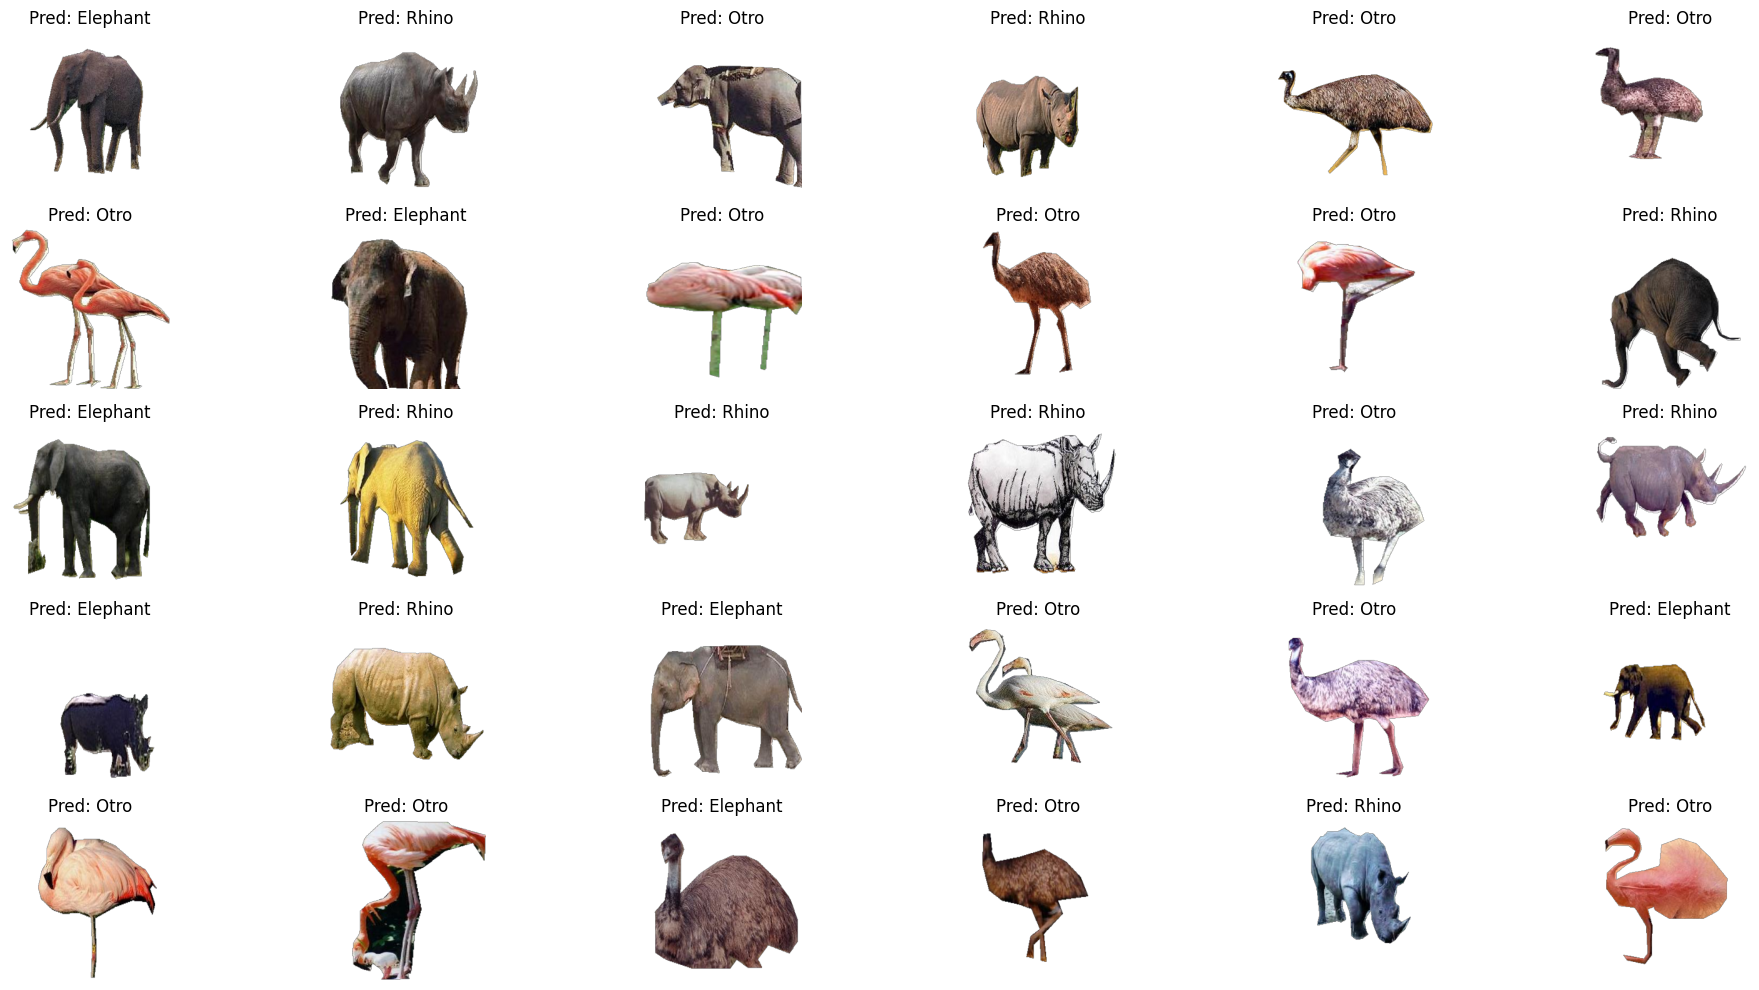

In [59]:

# Diccionario de etiquetas
etiquetas_dict = { 'E': 'Elephant', 'O': 'Otro', 'R': 'Rhino'}

# Número de imágenes que quieres mostrar
n_muestras = 30

# Seleccionar el número de filas y columnas para organizar las imágenes
n_filas = 5  # Definir 3 filas
n_columnas = 6  # Definir 10 columnas

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(20, 10))

# Aplanar los ejes para facilitar la indexación
axes = axes.flatten()

# Mostrar las imágenes
for i in range(n_muestras):
    # Obtener la imagen y la etiqueta real
    img = X_test[i]
    etiqueta_real = y_test[i]
    etiqueta_predicha = y_pred[i]
    
    # Mostrar la imagen
    axes[i].imshow(img)
    
    # Títulos de las imágenes con la etiqueta real y la predicción
    axes[i].set_title(f'Pred: {etiquetas_dict[etiqueta_predicha]}')
    
    # Ocultar los ejes
    axes[i].axis('off')

# Ajustar el espaciado y mostrar todas las imágenes
plt.tight_layout()
plt.show()


# LAPLACIANAS+ HOG + TEXTURE + RGB

In [42]:
# Combinar características
X_train_combined = np.hstack((X_train_lp7, X_train_hog,X_train_textura,X_train_rgb))
X_test_combined = np.hstack((X_test_lp7, X_test_hog,X_test_textura,X_test_rgb))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       0.95      0.87      0.91        23
           R       0.71      0.92      0.80        13

    accuracy                           0.84        49
   macro avg       0.83      0.83      0.82        49
weighted avg       0.85      0.84      0.84        49



LAPLACIANA + TEXTURE + RGB

In [45]:
# Combinar características
X_train_combined = np.hstack((X_train_lp7,X_train_textura,X_train_rgb))
X_test_combined = np.hstack((X_test_lp7,X_test_textura,X_test_rgb))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.67      0.62      0.64        13
           O       0.70      0.83      0.76        23
           R       0.50      0.38      0.43        13

    accuracy                           0.65        49
   macro avg       0.62      0.61      0.61        49
weighted avg       0.64      0.65      0.64        49



LAPLACIANA + TEXTURE + HSV

In [46]:
# Combinar características
X_train_combined = np.hstack((X_train_lp7,X_train_textura,X_train_hsv))
X_test_combined = np.hstack((X_test_lp7,X_test_textura,X_test_hsv))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.67      0.62      0.64        13
           O       0.70      0.83      0.76        23
           R       0.50      0.38      0.43        13

    accuracy                           0.65        49
   macro avg       0.62      0.61      0.61        49
weighted avg       0.64      0.65      0.64        49



# CANNY + HOG

In [51]:


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(animales, et_animales, test_size=0.2, random_state=42)


# Extraer características RGB
X_train_canny = np.array([extraer_caracteristicas_canny(img)for img in X_train]).reshape(-1, 1)
X_test_canny = np.array([extraer_caracteristicas_canny(img) for img in X_test]).reshape(-1, 1)

# Combinar características
X_train_combined = np.hstack((X_train_canny, X_train_hog))
X_test_combined = np.hstack((X_test_canny, X_test_hog))

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       1.00      0.78      0.88        23
           R       0.60      0.92      0.73        13

    accuracy                           0.80        49
   macro avg       0.81      0.80      0.79        49
weighted avg       0.85      0.80      0.80        49



CANNY + LAPLACIANAS + TEXTURA + HSV

In [52]:
# Combinar características
X_train_combined = np.hstack((X_train_canny,X_train_lp7,X_train_textura,X_train_hsv))
X_test_combined = np.hstack((X_test_canny,X_test_lp7,X_test_textura,X_test_hsv))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.56      0.69      0.62        13
           O       0.86      0.78      0.82        23
           R       0.58      0.54      0.56        13

    accuracy                           0.69        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.71      0.69      0.70        49



# CANNY + LAPLACIANAS + TEXTURA + HSV + HOG

In [ ]:
animales = np.concatenate([np.array(rhinos),np.array(elefantonaldos),np.array(flamencazos), np.array(epamues)])
print(len(animales))
et_animales= np.concatenate([np.array(et_rhin),np.array(et_ele),np.array(et_flam), np.array(et_emu)])
print(len(et_animales))


243
243


In [55]:
# Combinar características
X_train_combined = np.hstack((X_train_canny,X_train_lp7, X_train_hog,X_train_textura,X_train_rgb))
X_test_combined = np.hstack((X_test_canny,X_test_lp7, X_test_hog,X_test_textura,X_test_rgb))
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Ajustar y transformar para el conjunto de entrenamiento
X_test_combined = scaler.transform(X_test_combined)
# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', C=1.0)  # Puedes ajustar el kernel ('linear', 'rbf', etc.) y el parámetro C
modelo_svm.fit(X_train_combined, y_train)

# Predicciones
y_pred = modelo_svm.predict(X_test_combined)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           E       0.82      0.69      0.75        13
           O       0.95      0.87      0.91        23
           R       0.71      0.92      0.80        13

    accuracy                           0.84        49
   macro avg       0.83      0.83      0.82        49
weighted avg       0.85      0.84      0.84        49

